In [1]:
import pandas as pd
df=pd.read_csv('stack_overflow_edgelist.csv', sep=',',header=0)
df.values

firstCol = df.iloc[:,0]
firstCol[1]

secondCol = df.iloc[:,1]
secondCol[0]

#converts the col of number strings to floats and stores results in thirdColFloats list
thirdColFloats = list()
thirdCol = df.iloc[:,2]
for newF in thirdCol:
    thirdColFloats.append(float(newF))
thirdColFloats

#packs fCol,sCol,tColFloats into a tuple for add edge function later
tupleEdges = list(zip(firstCol,secondCol,thirdColFloats))
tupleEdges[0]

('azure', '.net', 20.933192346640453)

In [2]:
nodeNoRepeat = list()
for k in firstCol:
    if k not in nodeNoRepeat:
        nodeNoRepeat.append(k)

for i in secondCol: #just incase there was a target node not in the source
    if i not in nodeNoRepeat:
        nodeNoRepeat.append(i)

#nodeNoRepeat #list of all nodes

Name: 
Type: DiGraph
Number of nodes: 115
Number of edges: 490
Average in degree:   4.2609
Average out degree:   4.2609


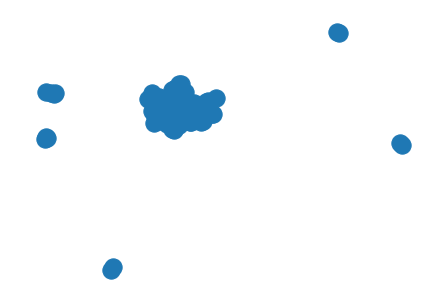

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

g=nx.DiGraph()

#add the nodes to the graph
g.add_nodes_from(nodeNoRepeat)

#add weigthed edges from tuple created earlier
g.add_weighted_edges_from(tupleEdges)



#print graph info as well as image of graph
print(nx.info(g))
nx.draw(g)
plt.show()

In [4]:
import operator #used to sort the dictionary

#apply pageRank algorithm to graph
pageRank = nx.pagerank(g)

#sort dictionary and turn it into a list
sorted_pageRank = list(sorted(pageRank.items(), key=operator.itemgetter(1), reverse=True))
sorted_pageRank 

print('Top 10 page rank nodes: ')
for i in range(10):
    print('\t',sorted_pageRank[i])
    
print('Bottom 10 page rank nodes: ')
for i in range(10):
    print('\t',sorted_pageRank[-(i+1)])
    


Top 10 page rank nodes: 
	 ('css', 0.024720588501132967)
	 ('c#', 0.02371331087233847)
	 ('jquery', 0.022743074427649015)
	 ('asp.net', 0.022240775454020704)
	 ('linux', 0.022187155521953175)
	 ('spring', 0.020541825066040464)
	 ('hibernate', 0.01880181941480898)
	 ('javascript', 0.01794346962140414)
	 ('php', 0.017078309651029976)
	 ('python', 0.01650008382345548)
Bottom 10 page rank nodes: 
	 ('photoshop', 0.0019703691137557254)
	 ('mvc', 0.002158191479575023)
	 ('drupal', 0.0023140343226593844)
	 ('xamarin', 0.0023196333796145236)
	 ('unity3d', 0.002333092773604437)
	 ('ionic-framework', 0.002426043436685366)
	 ('visual-studio', 0.002444826186040644)
	 ('api', 0.0025794761495096614)
	 ('vue.js', 0.0026662375974277385)
	 ('eclipse', 0.0026786899507819256)
